In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ncf = pd.read_csv("./SD_analysis_random_ncf.csv")
nk2 = pd.read_csv("./SD_analysis_random_nk2.csv")
nk3 = pd.read_csv("./SD_analysis_random_nk3.csv")
bbm = pd.read_csv("./SD_analysis_bbm-bnet-inputs-random.csv")
bbm_agg = bbm.copy()
bbm_agg["name"] = bbm_agg["name"].apply(lambda x: x.split("_")[0])
bbm_agg = bbm_agg.groupby("name").mean().reset_index()

In [3]:
frames = {
    "Nested Canalizing": ncf,
    "Critical NK (K=2)": nk2,
    "Critical NK (K=3)": nk3,
    "BBM (Aggregate)": bbm_agg,
}
network_type_colors = {
    "Nested Canalizing": "#228833",
    "Critical NK (K=2)": "#66ccee",
    "Critical NK (K=3)": "#4477aa",
    "BBM (Aggregate)": "#aa3377",
}

In [4]:
bbm_agg.head()

,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,001,321.0,1.031250,0.015625,1.015625,1.015625,0.0
1,002,139.0,33752.298246,NaN,312.619469,312.619469,0.0
2,003,20.0,2.000000,0.500000,1.500000,1.500000,0.0
3,004,247.0,NaN,NaN,NaN,NaN,NaN
4,005,28.0,7.000000,4.000000,1.000000,1.000000,0.0


In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import bootstrap
from scipy.stats import iqr
from scipy.stats import kurtosis

def get_bootstrap(of_interest, statistics, log):
    fig, ax = plt.subplots(4, 3)
    fig.set_size_inches(10, 20)

    fig.suptitle(f'{statistics.__name__} of {of_interest} {log=}', fontsize=16, y=0.91)


    row = 0
    for name, df in frames.items():

        data = np.array(df.loc[:,of_interest])
        data = data[~np.isnan(data)]

        if log:
            array = np.log2(data)
        else:
            array = data

        var_sample = statistics(array)  # the sample statistic


        print(f"{of_interest} {statistics.__name__} {log=} of {name}, {var_sample}")

        res_BCa = bootstrap((array,), statistics, confidence_level=0.95)
        res_per = bootstrap((array,), statistics, confidence_level=0.95, method="percentile")
        res_bas = bootstrap((array,), statistics, confidence_level=0.95, method="basic")


        print(f"95% interval (BCa), {res_BCa.confidence_interval.low}, {res_BCa.confidence_interval.high}")
        print(f"95% interval (percentile), {res_per.confidence_interval.low}, {res_per.confidence_interval.high}")
        print(f"95% interval (basic), {res_bas.confidence_interval.low}, {res_bas.confidence_interval.high}\n")


        if statistics == iqr and log==False and name != "BBM (Aggregate)":
            bin_BCa = range(math.floor(min(res_BCa.bootstrap_distribution)), math.ceil(max(res_BCa.bootstrap_distribution))+1)
            bin_per = range(math.floor(min(res_per.bootstrap_distribution)), math.ceil(max(res_per.bootstrap_distribution))+1)
            bin_bas = range(math.floor(min(res_bas.bootstrap_distribution)), math.ceil(max(res_bas.bootstrap_distribution))+1)
            ax[row, 0].hist(res_BCa.bootstrap_distribution, bins=bin_BCa)
            ax[row, 1].hist(res_per.bootstrap_distribution, bins=bin_per)
            ax[row, 2].hist(res_bas.bootstrap_distribution, bins=bin_bas)
        else:
            ax[row, 0].hist(res_BCa.bootstrap_distribution)
            ax[row, 1].hist(res_per.bootstrap_distribution)
            ax[row, 2].hist(res_bas.bootstrap_distribution)


        ax[row, 0].set_ylabel(f'frequency for {name}')

        if row == 0:
            ax[row, 0].set_title(f'Bootstrap (BCa)')
            ax[row, 1].set_title(f'Bootstrap (percentile)')
            ax[row, 2].set_title(f'Bootstrap (basic)')
        
        if row == 3:
            ax[row, 0].set_xlabel(f'{statistics.__name__} of {of_interest} {log=}')
            ax[row, 1].set_xlabel(f'{statistics.__name__} of {of_interest} {log=}')
            ax[row, 2].set_xlabel(f'{statistics.__name__} of {of_interest} {log=}')
            
        row+=1

    plt.show()

sd size mean log=True of Nested Canalizing, 2.0122934600763887
95% interval (BCa), 1.995485468761719, 2.028832127060026
95% interval (percentile), 1.9956395450158873, 2.029146791319875
95% interval (basic), 1.9956870140753091, 2.0289443873520714

sd size mean log=True of Critical NK (K=2), 1.6963469489170073
95% interval (BCa), 1.6793575500695663, 1.7137795011982009
95% interval (percentile), 1.6787400914017496, 1.714021014408061
95% interval (basic), 1.6793594952483037, 1.7133817749731335

sd size mean log=True of Critical NK (K=3), 1.760494283295972
95% interval (BCa), 1.7430577554008229, 1.7777325634149936
95% interval (percentile), 1.7432917172423152, 1.777807204956078
95% interval (basic), 1.7431286577811043, 1.7779746546023858

sd size mean log=True of BBM (Aggregate), 2.3964507139874445
95% interval (BCa), 2.075102388507853, 2.797734719618412
95% interval (percentile), 2.052812563381245, 2.7626972194196644
95% interval (basic), 2.023571649042454, 2.7377701520843587



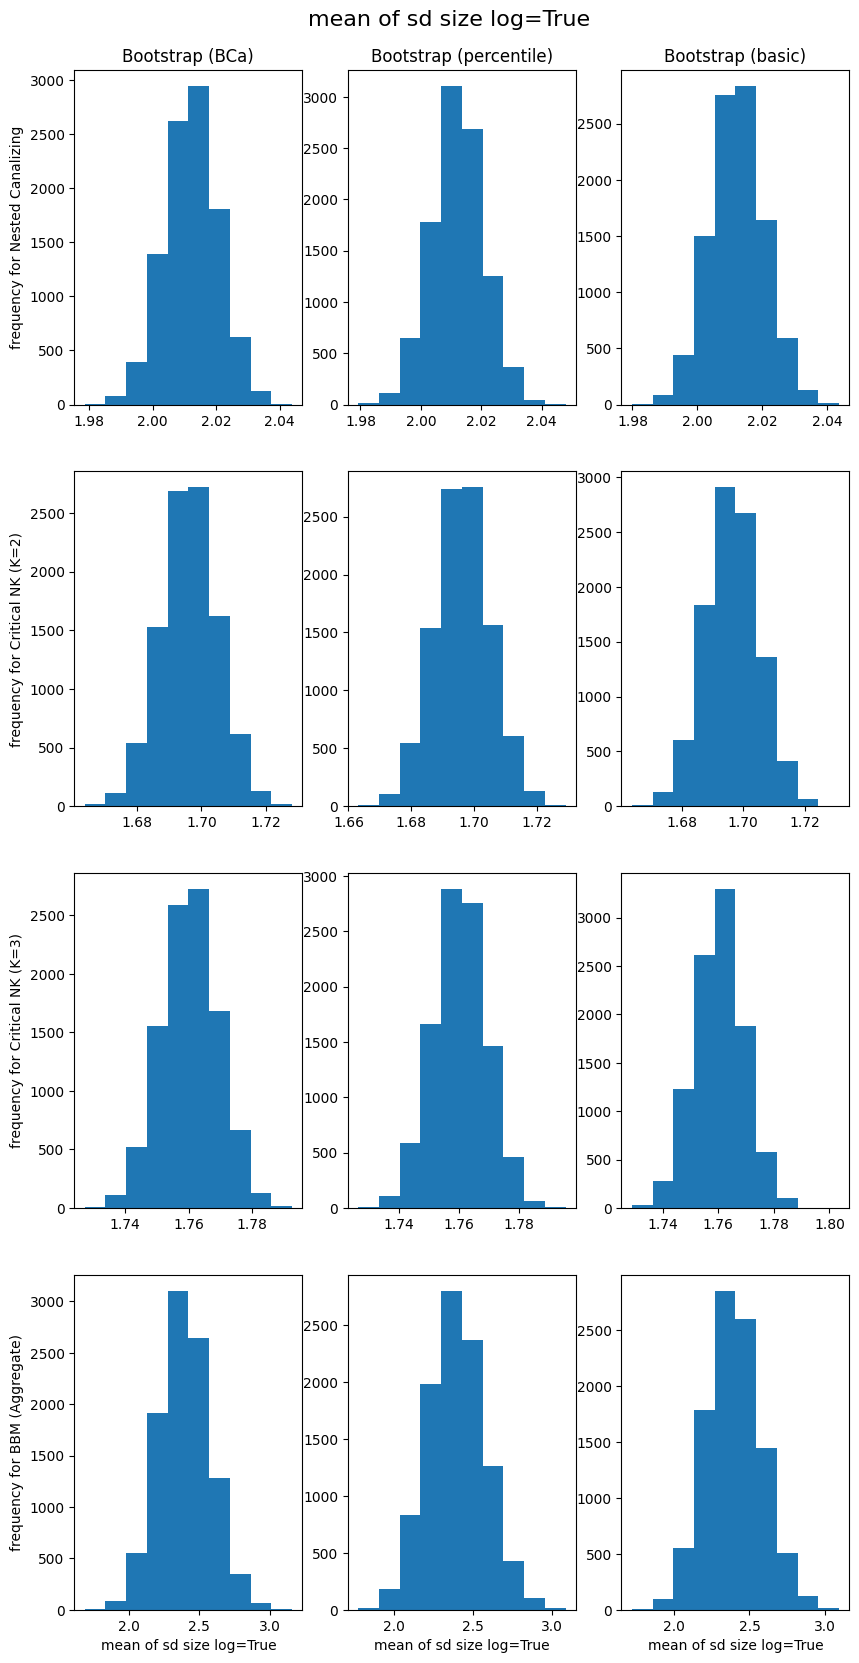

In [6]:
get_bootstrap(of_interest="sd size", statistics=np.mean, log=True)

attractors mean log=True of Nested Canalizing, 0.8954813486551075
95% interval (BCa), 0.8839719211847886, 0.9070749265815302
95% interval (percentile), 0.8838383673416218, 0.9071435983019961
95% interval (basic), 0.8837481241391744, 0.9071904950262386

attractors mean log=True of Critical NK (K=2), 0.7830431642048903
95% interval (BCa), 0.7715050372901061, 0.7943999825647217
95% interval (percentile), 0.7715666283942321, 0.7946257864841086
95% interval (basic), 0.7717310182152418, 0.7944793794789945

attractors mean log=True of Critical NK (K=3), 0.6733108067812377
95% interval (BCa), 0.6626255247503957, 0.6839964095305805
95% interval (percentile), 0.6628437668334224, 0.683805526068901
95% interval (basic), 0.6627883356019225, 0.6836481292300085

attractors mean log=True of BBM (Aggregate), 1.2519652746911711
95% interval (BCa), 1.0600842769852188, 1.4809547790649926
95% interval (percentile), 1.053771485123914, 1.4651002540343918
95% interval (basic), 1.0360612988066171, 1.4558725499

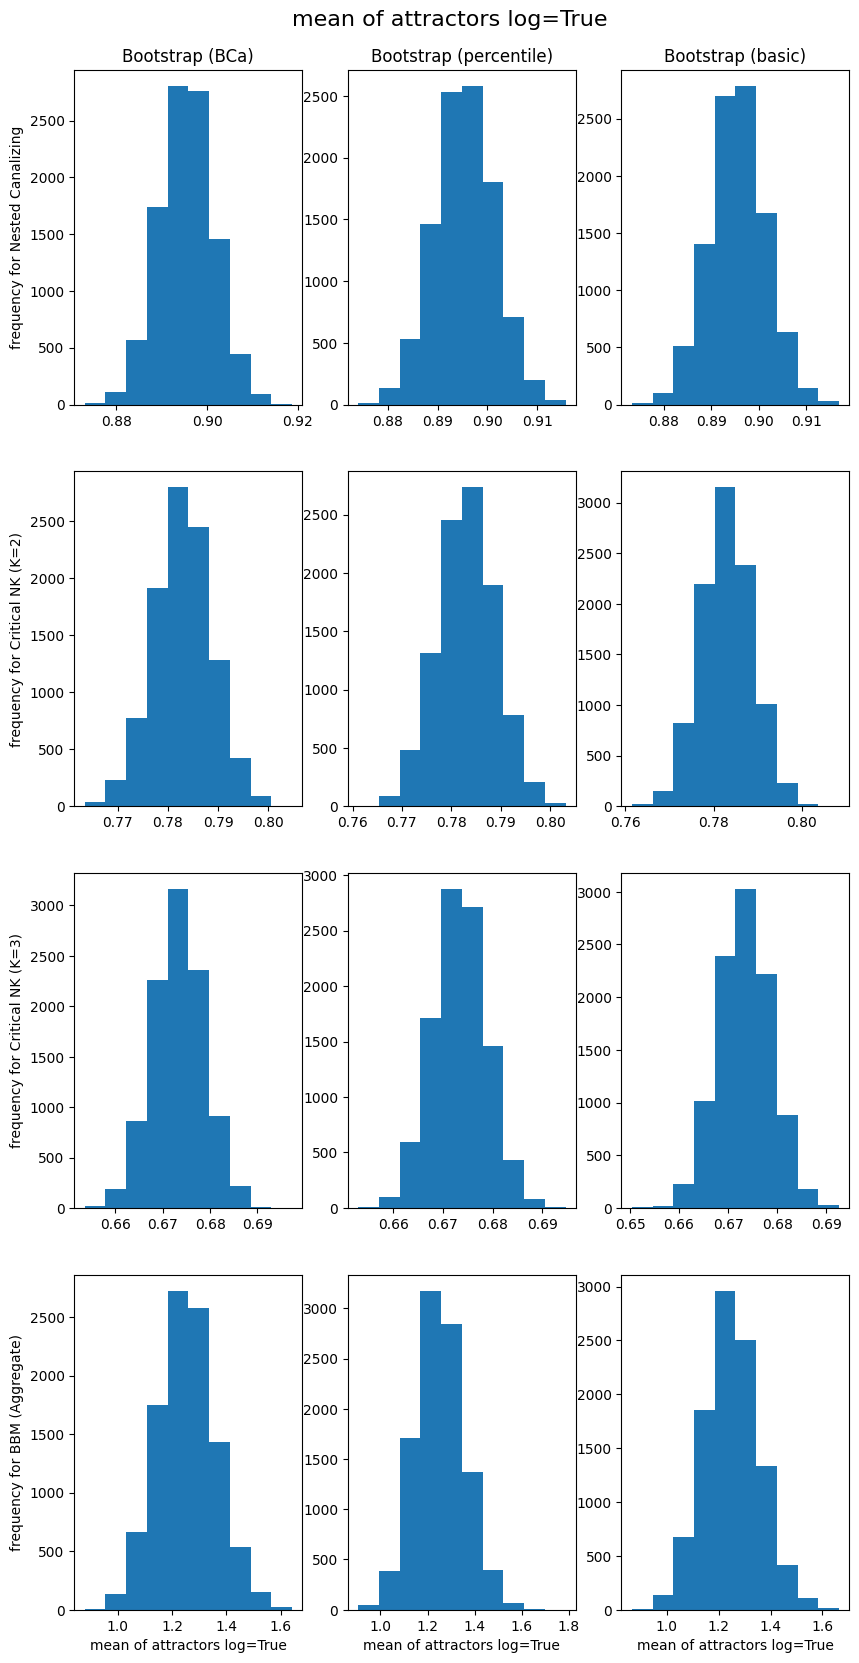

In [7]:
get_bootstrap(of_interest="attractors", statistics=np.mean, log=True)

sd size var log=True of Nested Canalizing, 1.6408732985452632
95% interval (BCa), 1.608611570514283, 1.675262904720769
95% interval (percentile), 1.608503355875001, 1.6746020576670142
95% interval (basic), 1.6076597859087502, 1.6732342039850878

sd size var log=True of Critical NK (K=2), 1.7839250319954716
95% interval (BCa), 1.7489643114720224, 1.820556817229016
95% interval (percentile), 1.749682300598496, 1.8192630433659407
95% interval (basic), 1.7480866736079037, 1.8187873714465705

sd size var log=True of Critical NK (K=3), 1.7783503606806943
95% interval (BCa), 1.7443157813921464, 1.8141386144130052
95% interval (percentile), 1.7436243349858962, 1.8131216312575527
95% interval (basic), 1.7427179468706655, 1.8132197440427897

sd size var log=True of BBM (Aggregate), 7.584941329715296
95% interval (BCa), 5.428043187375144, 11.01475597638907
95% interval (percentile), 5.102331932457304, 10.430785168499714
95% interval (basic), 4.84009422929341, 10.11537544437832



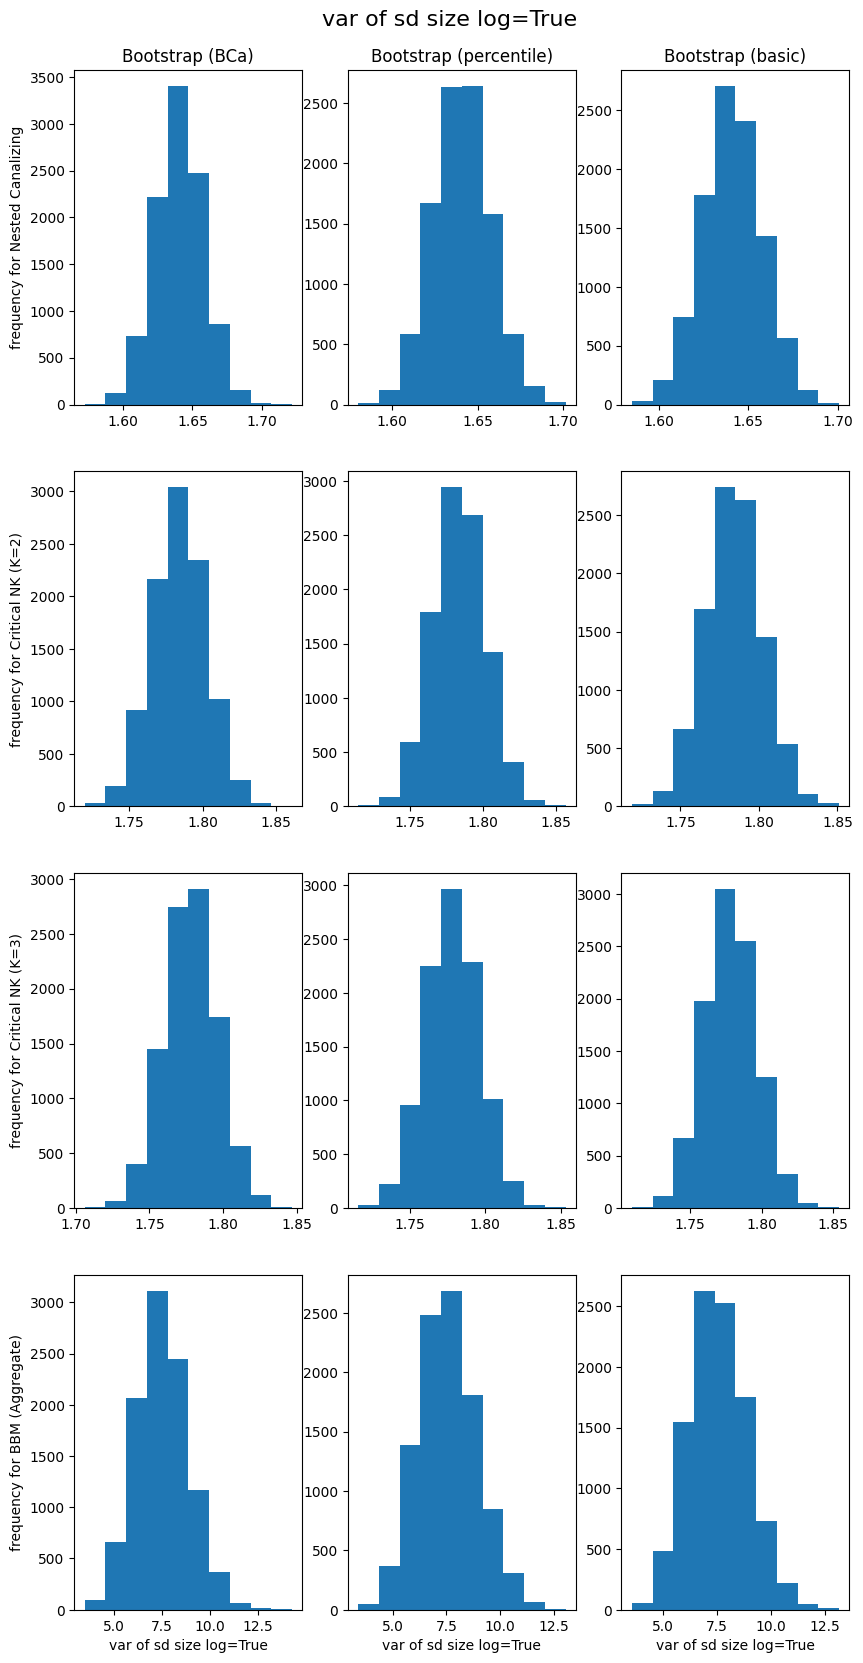

In [8]:
get_bootstrap(of_interest="sd size", statistics=np.var, log=True)

attractors var log=True of Nested Canalizing, 0.8052905810738198
95% interval (BCa), 0.789860793063662, 0.8216486348264758
95% interval (percentile), 0.7891069244062696, 0.821412961160377
95% interval (basic), 0.7894587440713872, 0.8213869533203437

attractors var log=True of Critical NK (K=2), 0.7695839463808435
95% interval (BCa), 0.7532331370185332, 0.7862826134968174
95% interval (percentile), 0.75323604340772, 0.7863824009071654
95% interval (basic), 0.7532135352759932, 0.7858533073159183

attractors var log=True of Critical NK (K=3), 0.6678419395390728
95% interval (BCa), 0.6538361909007403, 0.6823640648903264
95% interval (percentile), 0.653729264950815, 0.6824620796690432
95% interval (basic), 0.653241763324077, 0.6820339253121611

attractors var log=True of BBM (Aggregate), 2.590949499681285
95% interval (BCa), 1.8847223006015297, 3.755622174711209
95% interval (percentile), 1.7450740826444038, 3.5461676696874878
95% interval (basic), 1.6455788827030067, 3.430612632203843



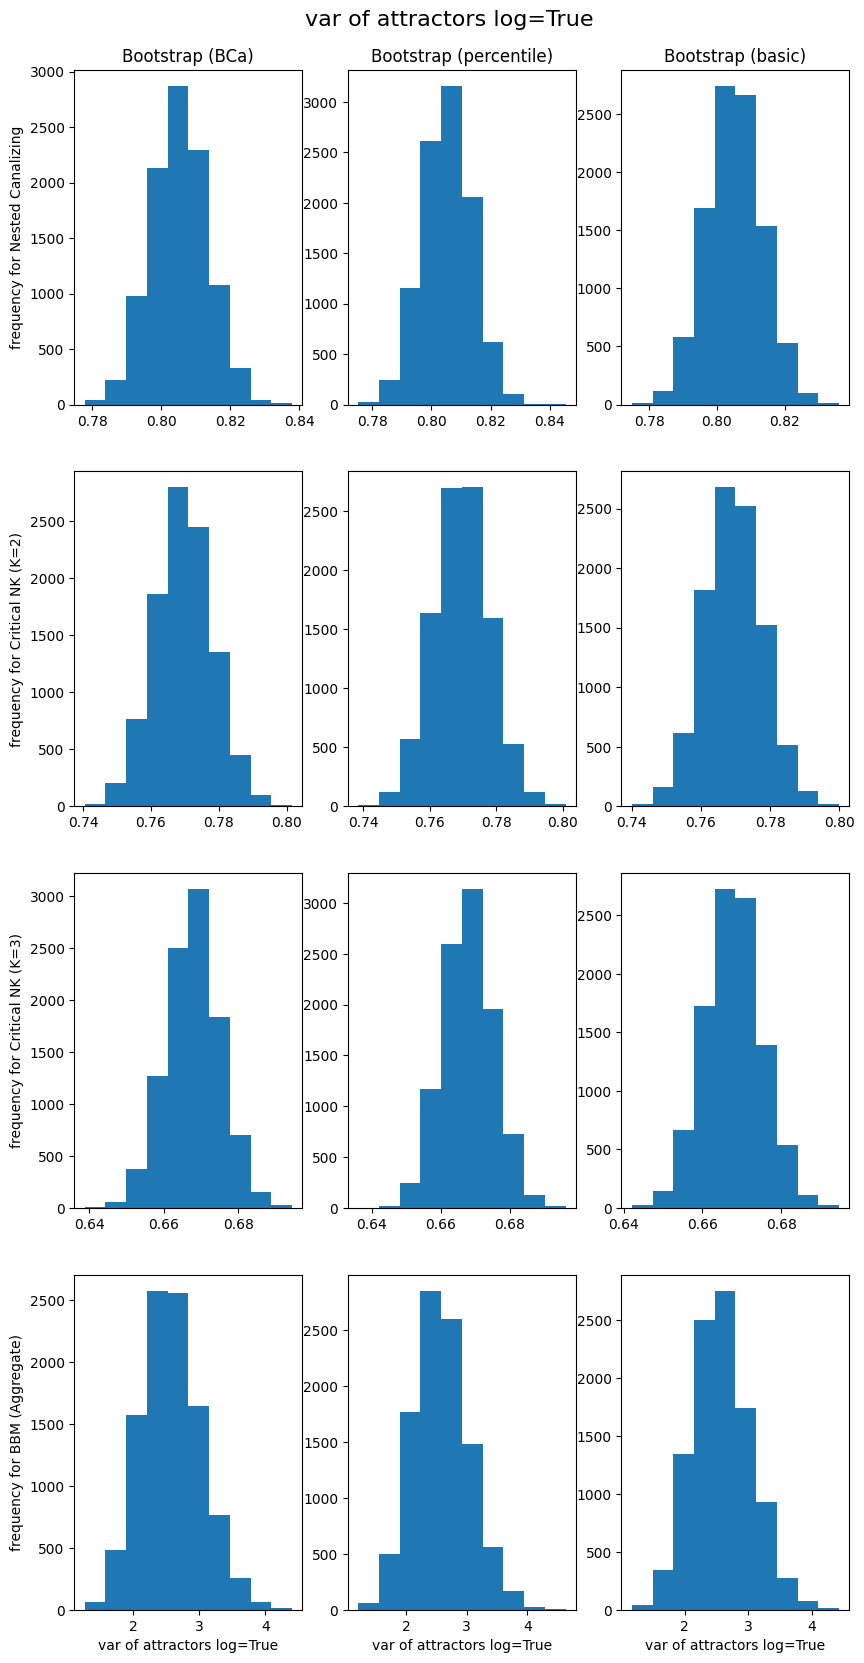

In [9]:
get_bootstrap(of_interest="attractors", statistics=np.var, log=True)

sd size kurtosis log=True of Nested Canalizing, 0.40999509622418984
95% interval (BCa), 0.2723309816605721, 0.6175721406629152
95% interval (percentile), 0.2574646608456824, 0.5899525889534686
95% interval (basic), 0.22901173224553772, 0.5658137505497929

sd size kurtosis log=True of Critical NK (K=2), 0.35835652121711803
95% interval (BCa), 0.226313785491678, 0.5291449795702375
95% interval (percentile), 0.21429744550993865, 0.5146016084789075
95% interval (basic), 0.20320463766483543, 0.5009956546291732

sd size kurtosis log=True of Critical NK (K=3), 0.3431940363827768
95% interval (BCa), 0.20299662645029626, 0.5417836370796262
95% interval (percentile), 0.18699469568582672, 0.5159270694777195
95% interval (basic), 0.1733267535369759, 0.49728266590114933

sd size kurtosis log=True of BBM (Aggregate), 5.391396400284279
95% interval (BCa), 3.150517392270161, 8.7903928966069
95% interval (percentile), 2.588066977105894, 8.050613305412153
95% interval (basic), 2.67279270741008, 8.176644

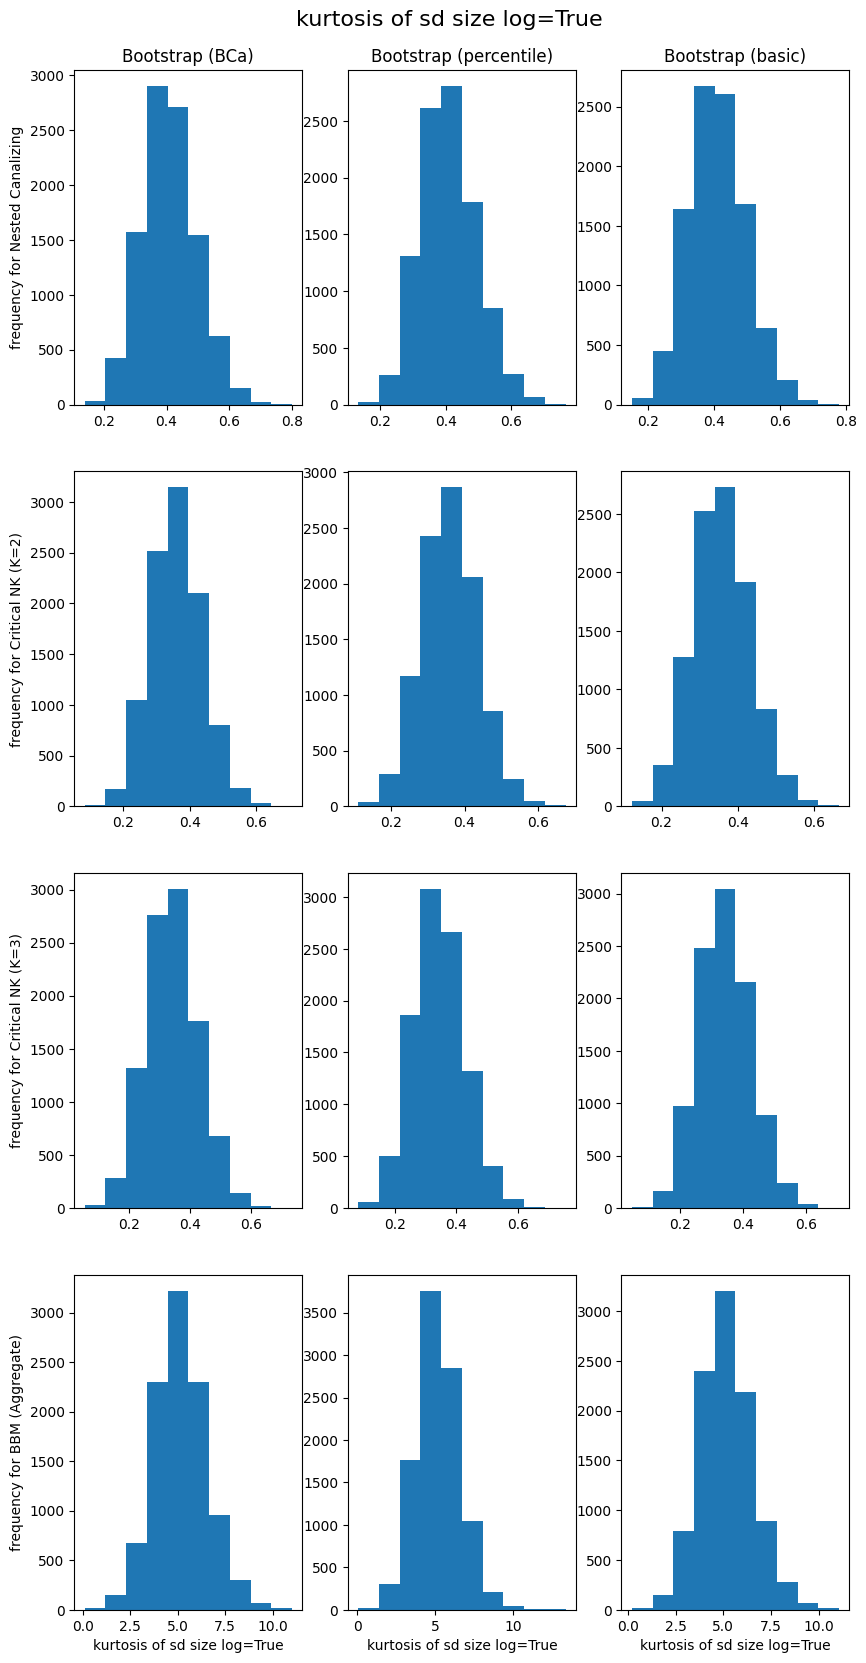

In [10]:
get_bootstrap(of_interest="sd size", statistics=kurtosis, log=True)

attractors kurtosis log=True of Nested Canalizing, 0.3892070546168762
95% interval (BCa), 0.19165603508003354, 0.7156920605852738
95% interval (percentile), 0.16254678005294654, 0.6575469971938686
95% interval (basic), 0.11484149052439119, 0.6146324042056597

attractors kurtosis log=True of Critical NK (K=2), 0.7426623414893263
95% interval (BCa), 0.5592365529213125, 0.9838408664180194
95% interval (percentile), 0.542072686006755, 0.959313543177597
95% interval (basic), 0.5196297946309245, 0.9440825382007618

attractors kurtosis log=True of Critical NK (K=3), 0.7554362472061111
95% interval (BCa), 0.5919836580327636, 0.9782437769399684
95% interval (percentile), 0.5735711320574154, 0.9597769376799445
95% interval (basic), 0.5595942046408194, 0.9402580889786627

attractors kurtosis log=True of BBM (Aggregate), 5.170157180077993
95% interval (BCa), 2.896548196021254, 9.287859711159008
95% interval (percentile), 2.2584490885010435, 8.038743995479514
95% interval (basic), 2.316916115435875

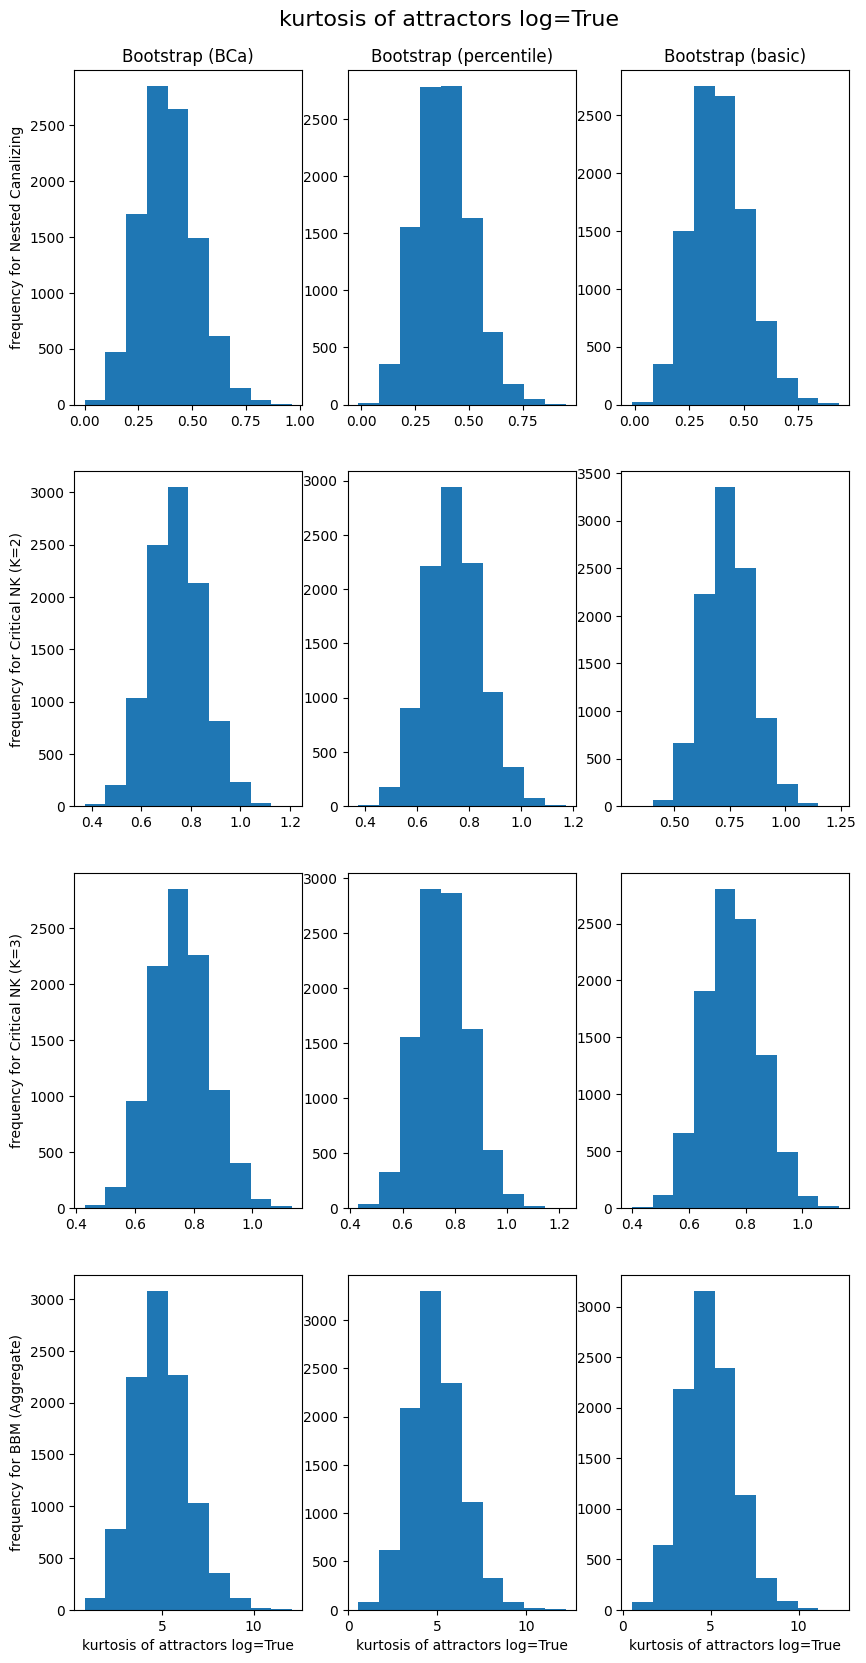

In [11]:
get_bootstrap(of_interest="attractors", statistics=kurtosis, log=True)

sd size mean log=False of Nested Canalizing, 6.426695652173913
95% interval (BCa), 6.287100216253273, 6.612681844034848
95% interval (percentile), 6.268954347826087, 6.600871739130435
95% interval (basic), 6.2565413043478255, 6.578352173913043

sd size mean log=False of Critical NK (K=2), 5.500173913043478
95% interval (BCa), 5.372130434782608, 5.654347687955252
95% interval (percentile), 5.364434782608695, 5.642486956521739
95% interval (basic), 5.356515217391305, 5.636652173913044

sd size mean log=False of Critical NK (K=3), 5.718739130434782
95% interval (BCa), 5.582739130434782, 5.8909910556699865
95% interval (percentile), 5.569476086956522, 5.883186956521739
95% interval (basic), 5.559041304347826, 5.867915217391304

sd size mean log=False of BBM (Aggregate), 447.56358670975345
95% interval (BCa), 151.23469127940294, 1193.4036768531537
95% interval (percentile), 72.41465342786344, 955.1870213719181
95% interval (basic), -57.753728160744345, 828.2535982543087



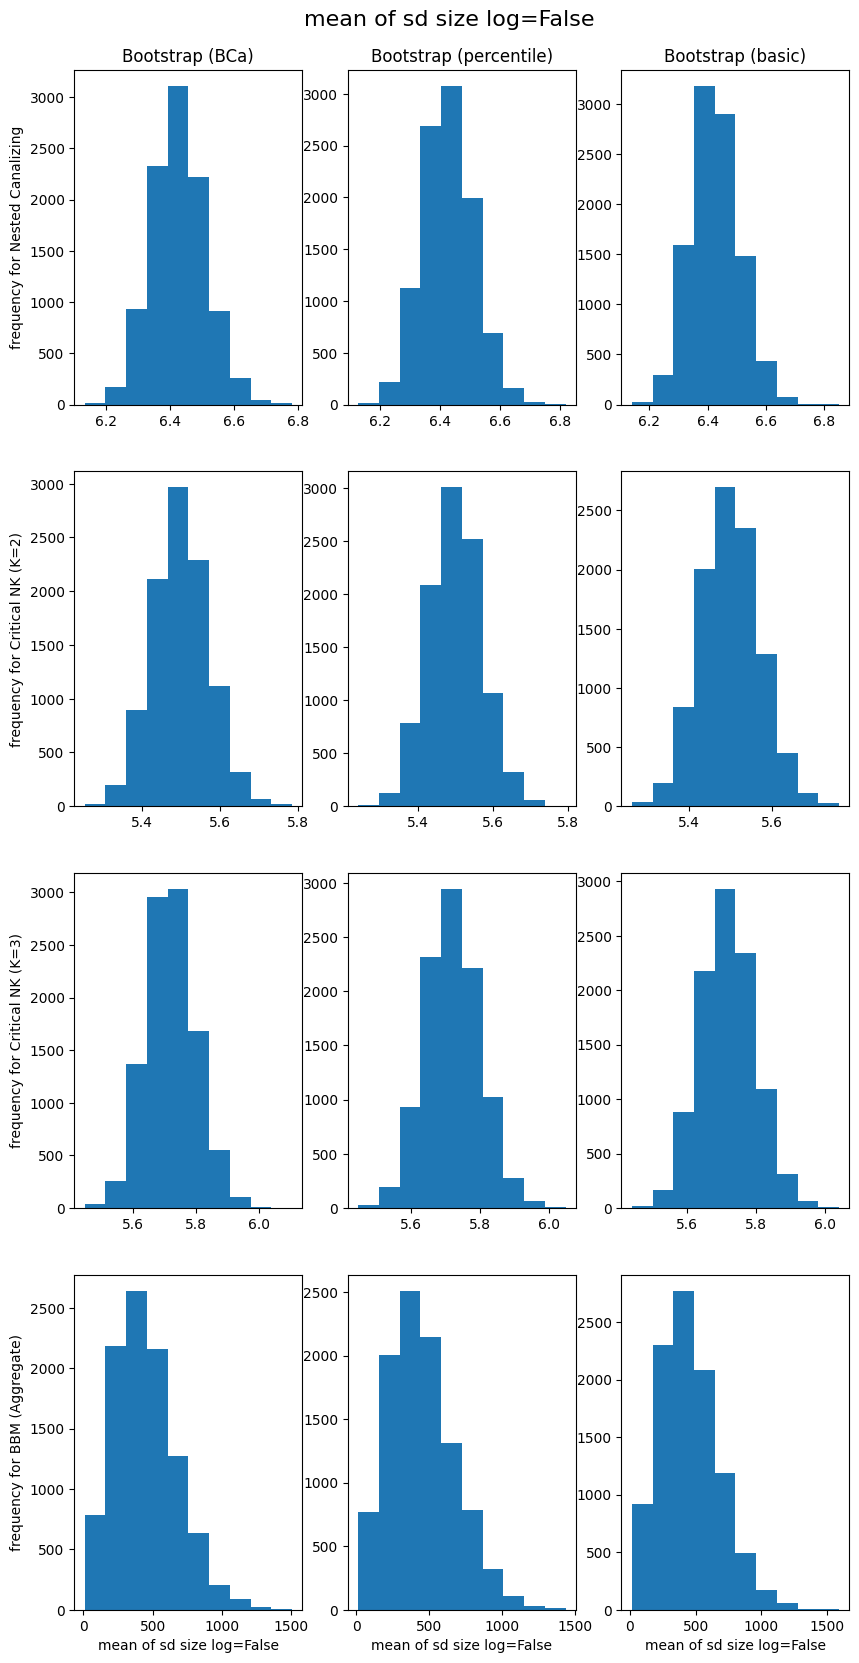

In [12]:
get_bootstrap(of_interest="sd size", statistics=np.mean, log=False)